# **Sustitución por valores arbitrarios o valores constantes**

Los métodos de imputación consisten en estimar los valores faltantes en base a los valores existentes de la variable. El objetivo de cualquier método de imputación es producir un **conjunto completo** de datos que pueda ser utilizado por un algoritmo de aprendizaje de máquina.


Como su nombre lo indica, la sustitución por valores arbitrarios consiste en reemplazar los valores nulos por un valor cualquiera, arbitrario. Típicamente se usan valores como  0, 999, -999 (u otras combinaciones de 9s) o -1 (si la distribución es positiva).

### Cuáles variables se pueden sustituir con valores arbitrarios o constantes?

Variables categóricas o numéricas pueden ser sustituidas por valores arbitrarios

Para variables categóricas, es equivalente a reemplazar los valores nulos por una etiqueta adicional.

### Condiciones

- MNAR - Los datos no faltan de forma aleatoria

Si este es el caso, queremos comunicar que estos valores nulos son diferentes y por lo tanto los reemplazamos con un valor arbitrario y no con la media/mediana que representan los valores más comunes.


### Ventajas

- Fácil de implementar
- Forma rápida de obtener conjuntos completos de datos
- Puede ser integrado en producción (durante el despliegue del modelo)
- Captura la importancia de la 'ausencia' (si existe)

### Limitaciones

- Distorsión de la distribución original de la variable
- Distorsión de la varianza original
- Distorsión de la covarianza con las otras variables en los datos.
- Si el valor arbitrario es al final de la distribución puede generar valores extremos
- El 'valor arbitrario' seleccionado debe ser escogido cuidadosamente para que no sea similar a otros valores comunes en los datos/distribución (media, mediana, moda)



### Cuando usar la sustitución por valor arbitrario?

Sustituir los valores nulos por un valor arbitrario se debe usar cuando hay razones suficientes para suponer que los datos no faltan al azar. En situaciones como estas, queremos resaltar que los datos faltantes. Por lo tanto no se sustituyen los valores por la media/mediana u otro valor común, sino por el contrario por un valor arbitrario o constante que muestre esa diferencia.

### Nota final

Cuando las variables son capturadas por terceras partes, como agencias de crédito, dichas organizaciones usan valores arbitrarios para resaltar los valores ausentes.

## En este demo:

Vamos a aprender como sustituir valores nulos con valores arbitrarios utilizando pandas y el Ames House Price y los datos del Titanic.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
usecols=['age', 'fare', 'survived']

In [ ]:
from pandas.core.internals.base import DataManager
data=sns.load_dataset('titanic')
data=data[usecols]
DataManager

pandas.core.internals.base.DataManager

In [ ]:
# porcentaje de valores nulos

data.isnull().mean()

age         0.198653
fare        0.000000
survived    0.000000
dtype: float64

### Para tener en cuenta

Los parámetros para la sustitución o imputación se deben aprender sobre el set de datos de entrenamiento, usado para entrenar el modelo. Luego estos mismos parámetros se utilizan para imputar valores nulos en el set de prueba. Y esto es para evitar sobre-ajustes.

Cuando se sustituyen valores nulos por valores arbitrarios, esta condición no es tan importante, ya que escogemos el valor arbitrariamente. Sin embargo, es bueno adherirse a esta premisa en la práctica y seleccionar el valor arbitrario analizando la distribución de la variable en el set de entrenamiento.


In [ ]:
# Separemos en sets de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # variables independientes
    data['survived'],  # target
    test_size=0.3,  # porcentaje de obs en test set
    random_state=0)  # semilla para reproducibilidad

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [ ]:
# exploremos datos nulos en el segmento de entrenamiento
# el porcentaje debe ser similar que para todo el
# conjunto de datos

X_train.isnull().mean()

age     0.194222
fare    0.000000
dtype: float64

In [ ]:
# creemos una función para sustituir los valores faltantes
# con un valor arbitrario

# la función toma como argumentos:
# dataframe, variable, y el valor de arbitrario para la sustitución
# retorna la variable con los valores sustituidos


def impute_na(df, variable, value):

    return df[variable].fillna(value)

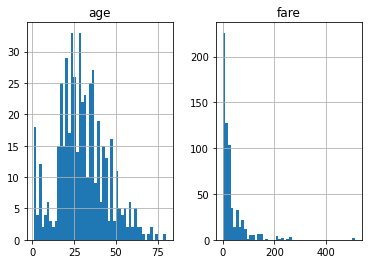

In [ ]:
# exploremos la distribución de la variable
# para seleccionar el valor arbitrario

X_train.hist(bins=50)
plt.show()

In [ ]:
# En este demo vamos a usar dos valor arbitrarios para la
# sustitución de los valores nulos en la variable 'age'
# uno al final de la distribución ==> 99
# y el otro -1, ya que age no toma valores negativos

# primero imputamos con 99
X_train['age_99'] = impute_na(X_train, 'age', 99)

# luego imputamos con -1
X_train['age_minus1'] = impute_na(X_train, 'age', -1)

X_train.head(15)

,age,fare,age_99,age_minus1
857,51.0,26.5500,51.0,51.0
52,49.0,76.7292,49.0,49.0
386,1.0,46.9000,1.0,1.0
124,54.0,77.2875,54.0,54.0
578,NaN,14.4583,99.0,-1.0
549,8.0,36.7500,8.0,8.0
118,24.0,247.5208,24.0,24.0
12,20.0,8.0500,20.0,20.0
157,30.0,8.0500,30.0,30.0
127,24.0,7.1417,24.0,24.0


Compara las filas con datos ausentes (NaN) en age, y observa como esos valores fueron reemplazados ya sea por 99 o -1.

In [ ]:
# vemos como la varianza cambia luego de la sustitución
# esto es de esperarse, porque el porcentaje de valores ausentes
# es relativamente grande en age, ~20%

print('Varianza variable original: ', X_train['age'].var())
print('Varianza luego de sustitución por 99: ', X_train['age_99'].var())
print('Varianza luego de sustitución por -1: ', X_train['age_minus1'].var())

Varianza variable original:  210.45286924636747
Varianza luego de sustitución por 99:  917.6372579490387
Varianza luego de sustitución por -1:  319.3288446599532


De hecho, el efecto de la varianza es influenciado por la magnitud del valor arbitrario seleccionado para la sustitución: comparen 99 con -1.

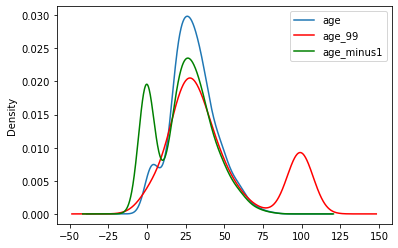

In [ ]:
# Comparemos distribuciones

fig = plt.figure()
ax = fig.add_subplot(111)

# distribución original de la variable
X_train['age'].plot(kind='kde', ax=ax)

# distribución variable sustituida con 99
X_train['age_99'].plot(kind='kde', ax=ax, color='red')

# distribución variable sustituida con -1
X_train['age_minus1'].plot(kind='kde', ax=ax, color='green')

# etiquetas
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

La sustitución por valores arbitrarios distorsiona la distribución original de la variable y como es de esperarse, la variable transformada tiene más valores alrededor del valor arbitrario seleccionado.

**Es esto importante?**

Depende del algoritmo de machine learning seleccionado para construir el modelo.
Los modelos lineales asumen que las variables están normalmente distribuidas. La sustitución por valores arbitrarios puede distorsionar la distribución normal original si el porcentaje de valores ausentes es alto y por lo tanto afectar el desempeño del modelo lineal.


Por el contrario, esta técnica funciona muy bien para los algoritmos basados en árboles.


In [ ]:
# esta técnica también puede afectar la relación de la variable imputada
# con las otras variables en los datos

# examinemos para ello la covarianza

X_train[['fare', 'age', 'age_99', 'age_minus1']].cov()

,fare,age,age_99,age_minus1
fare,2328.801583,78.468894,-48.531540,113.205643
age,78.468894,210.452869,210.452869,210.452869
age_99,-48.531540,210.452869,917.637258,-165.272555
age_minus1,113.205643,210.452869,-165.272555,319.328845


Podemos ver que la covariance entre Age y Fare cambio después de la sustitución.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


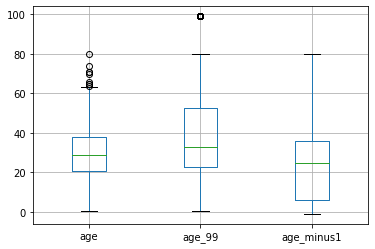

In [ ]:
# Finalmente, la sustitución arbitraria también puede
# generar observaciones que siendo completamente normales parecen
# valores extremos

# o en otras palabras la sustitución puede alterar
# el número percibido de valores extremos


# Gráfico de caja
X_train[['age', 'age_99', 'age_minus1']].boxplot()

De la gráfica anterior, podemos ver después de la sustitución hay más valores extremos hacia los valores altos de Age, pero también para los valores inferiores.


## House Prices Dataset

Repitamos rápidamente el mismo ejercicio con el House Prices dataset; este tiene variables con pocos o muchos valores nulos, por lo tanto podemos comparar el efecto de la sustitución en ambos escenarios.


In [ ]:
# Vamos a usar las siguientes variables
# 3 de las cuales tienen valores nulos

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [ ]:
import pandas as pd

In [ ]:
# House Prices dataset

data = pd.read_csv('https://raw.githubusercontent.com/RubixML/Housing/master/dataset.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data=data[cols_to_use]
data

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,7,856,856,1710,0,150,65,196,2003,208500
1,6,1262,1262,1262,298,284,80,0,1976,181500
2,7,920,920,1786,0,434,68,162,2001,223500
3,7,756,961,1717,0,540,60,0,1998,140000
4,8,1145,1145,2198,192,490,84,350,2000,250000
...,...,...,...,...,...,...,...,...,...,...
1455,6,953,953,1647,0,953,62,0,1999,175000
1456,6,1542,2073,2073,349,589,85,119,1978,210000
1457,7,1152,1188,2340,0,877,66,0,1941,266500
1458,5,1078,1078,1078,366,0,68,0,1950,142125


In [ ]:
# variables con valores nulos

# en la siguiente list comprehension, iteraremos sobre las columnas
# y seleccionaremos las que contienen valores nulos

[var for var in data.columns if data[var].isnull().sum() > 0]

[]

In [ ]:
# porcentaje de valores nulos

data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

Primero, separemos los datos en entrenamiento y prueba



In [ ]:
# separemos los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

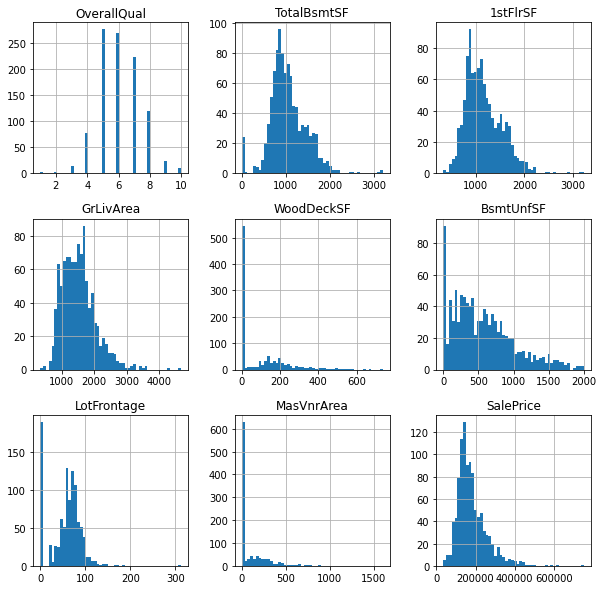

In [ ]:
# distribuciones de las variables

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [ ]:
# empecemos con la variable LotFrontage

# vamos a crear una nueva variable sustituyendo los valores nulos
# con el valor 999

# en este caso 999 es seleccionado para posicionar los valores
# al extremo derecho de la distribución
# ya que podemos ver del histograma anterior que LotFrontAge
# toma valores de hasta 300


X_train.loc[:,'LotFrontage_imputed'] = impute_na(X_train, 'LotFrontage', 999)
X_test.loc[:,'LotFrontage_imputed'] = impute_na(X_test, 'LotFrontage', 999)

In [ ]:
# MasVnrArea tiene valores de hasta 1500, por lo tanto, 999 no
# funcionaría como valor para sustituir con esta variable.
# usaremos 2999

X_train.loc[:,'MasVnrArea_imputed'] = impute_na(X_train, 'MasVnrArea', 2999)
X_test.loc[:,'MasVnrArea_imputed'] = impute_na(X_test, 'MasVnrArea', 2999)

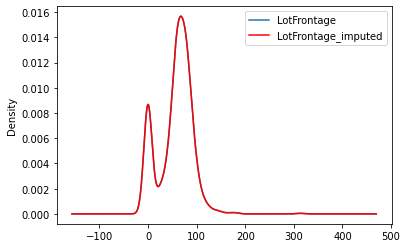

In [ ]:
# evaluemos el efecto de la sustitución en las distribuciones

# Vemos como en la variable imputada hay una acumulación de valores
# hacia el extremo derecho de LotFrontAge

fig = plt.figure()
ax = fig.add_subplot(111)

# distribución original
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# variable sustituida
X_train['LotFrontage_imputed'].plot(kind='kde', ax=ax, color='red')

# etiquetas
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

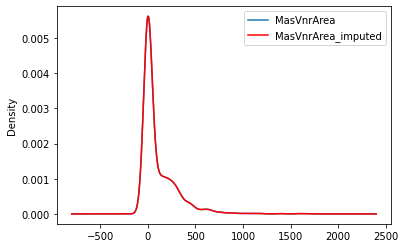

In [ ]:
# Como el porcentaje de valores nulos para MasVnrArea,
# era menor, el cambio en la distribución es menor

fig = plt.figure()
ax = fig.add_subplot(111)


# distribución original
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# variable sustituida con 2999
X_train['MasVnrArea_imputed'].plot(kind='kde', ax=ax, color='red')

# etiquetas
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Podemos observar de las gráficas anteriores que la distribución de LotFrontAge cambió dramáticamente, a diferencia de MasVnrArea. Esto se debe a que el % de valores nulos en la segunda variable es pequeño. Sin embargo, dependiendo del valor arbitrario seleccionado, la distribución se puede afectar más o menos.

Por qué no intentas imputar las variables con diferentes números y comparas las distribuciones?

Finalmente, podemos ver en el demo, que el proceso de seleccionar valores arbitrarios es bastante manual. Primero, tenemos que observar la distribución de cada variable, identificar los valores mínimos o máximos y finalmente seleccionar un valor que se acomode a cada variable para sustituir los valores nulos.  Una alternativa para automatizar este proceso, es seleccionar los valores arbitrarios siempre al extremo de la distribución, como veremos en el siguiente notebook

In [ ]:
# veamos ahora el efecto de la sustitución
# en la varianza

# Para LotFrontAge hay un cambio significativo ya que el porcentaje
# de valores nulos es alto, ~20%

print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after imputation: ', X_train['LotFrontage_imputed'].var())

Original Variance:  1166.3258000770516
Variance after imputation:  1166.3258000770516


In [ ]:
# Lo mismo sucede para MasnVnrArea, a pesar que el % de valores nulos es bajo,
# el valor arbitrario seleccionado es mucho más alto, lo cual influye
# en la varianza

print('Varianza original: ', X_train['MasVnrArea'].var())
print('Varianza despues de sustitución: ', X_train['MasVnrArea_imputed'].var())

Varianza original:  32874.27007404175
Varianza despues de sustitución:  32874.27007404175


In [ ]:
# Exploremos la covarianza:
# tómate el tiempo de comparar los valores en la tabla

X_train.cov()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,SalePrice,LotFrontage_imputed,MasVnrArea_imputed
OverallQual,1.843859,2.886241e+02,2.242973e+02,4.091242e+02,3.168557e+01,1.746147e+02,7.140486,1.005330e+02,8.320132e+04,7.140486,1.005330e+02
TotalBsmtSF,288.624075,1.682931e+05,1.212079e+05,8.615192e+04,1.227966e+04,7.513307e+04,2426.609753,2.465436e+04,2.003928e+07,2426.609753,2.465436e+04
1stFlrSF,224.297266,1.212079e+05,1.398656e+05,1.044401e+05,1.109406e+04,4.987449e+04,2399.494481,2.080136e+04,1.783631e+07,2399.494481,2.080136e+04
GrLivArea,409.124216,8.615192e+04,1.044401e+05,2.681277e+05,1.558395e+04,5.203392e+04,2711.556662,3.496714e+04,2.934477e+07,2711.556662,3.496714e+04
WoodDeckSF,31.685571,1.227966e+04,1.109406e+04,1.558395e+04,1.648582e+04,-1.833201e+03,-285.075911,3.212101e+03,3.029981e+06,-285.075911,3.212101e+03
BsmtUnfSF,174.614725,7.513307e+04,4.987449e+04,5.203392e+04,-1.833201e+03,1.875241e+05,2256.661389,7.472110e+03,6.833028e+06,2256.661389,7.472110e+03
LotFrontage,7.140486,2.426610e+03,2.399494e+03,2.711557e+03,-2.850759e+02,2.256661e+03,1166.325800,4.734195e+02,5.147233e+05,1166.325800,4.734195e+02
MasVnrArea,100.533003,2.465436e+04,2.080136e+04,3.496714e+04,3.212101e+03,7.472110e+03,473.419523,3.287427e+04,6.790442e+06,473.419523,3.287427e+04
SalePrice,83201.317781,2.003928e+07,1.783631e+07,2.934477e+07,3.029981e+06,6.833028e+06,514723.295173,6.790442e+06,6.105731e+09,514723.295173,6.790442e+06
LotFrontage_imputed,7.140486,2.426610e+03,2.399494e+03,2.711557e+03,-2.850759e+02,2.256661e+03,1166.325800,4.734195e+02,5.147233e+05,1166.325800,4.734195e+02
